<a href="https://colab.research.google.com/github/dayaiit/Machine-Learning/blob/main/L4_Improved_Neural_Network_with_Softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Improved Model Architecture:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 25)                  │          19,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 15)                  │             390 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,175 (78.81 KB)

 Trainable params: 20,175 (78.81 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5250 - loss: 1.5355 - val_accuracy: 0.8760 - val_loss: 0.4677
Epoch 2/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8950 - loss: 0.3735 - val_accuracy: 0.9040 - val_loss: 0.3777
Epoch 3/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9247 - loss: 0.2673 - val_accuracy: 0.9140 - val_loss: 0.3344
Epoch 4/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9363 - loss: 0.2326 - val_accuracy: 0.9105 - val_loss: 0.3180
Epoch 5/5
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9418 - loss: 0.2127 - val_accuracy: 0.9180 - val_loss: 0.3031

Example predictions from the improved model:
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


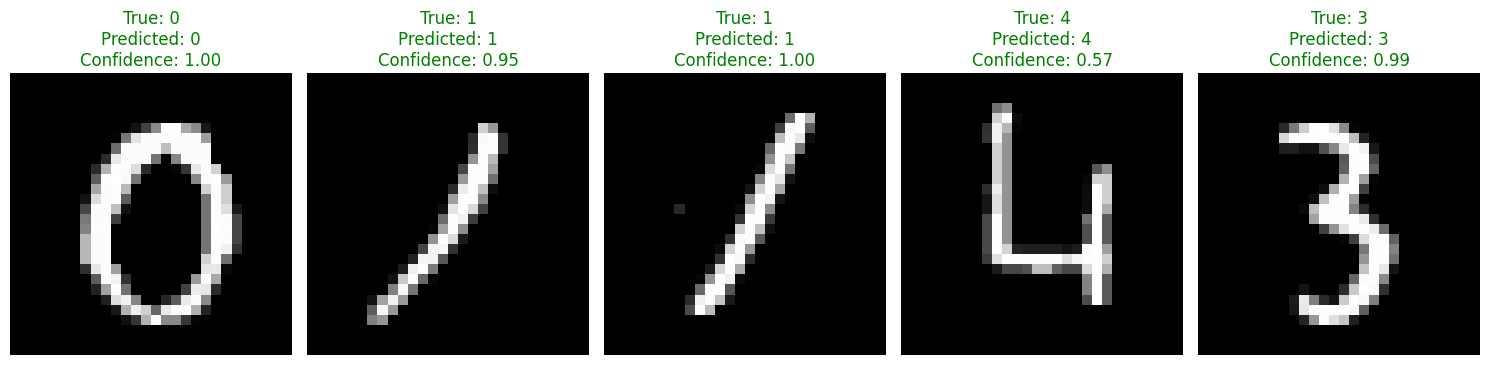

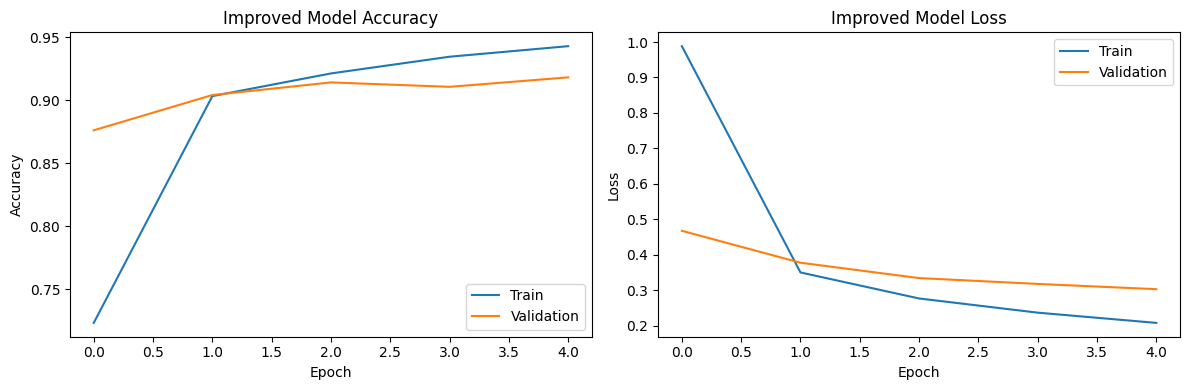

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load and prepare the MNIST dataset (same as before)
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0
X_train = X_train.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

# Function to display some example predictions
# THIS FUNCTION WAS MISSING IN THE PREVIOUS VERSION
def display_predictions(model, X_data, y_data, num_examples=5):
    # Get random samples
    indices = np.random.choice(len(X_data), num_examples, replace=False)

    # Get the model's predictions
    predictions = model.predict(X_data[indices])
    predicted_classes = np.argmax(predictions, axis=1)

    # Plot the results
    plt.figure(figsize=(15, 4))
    for i, idx in enumerate(indices):
        plt.subplot(1, num_examples, i+1)
        plt.imshow(X_data[idx].reshape(28, 28), cmap='gray')

        # Show the true label and predictions
        title = f"True: {y_data[idx]}\nPredicted: {predicted_classes[i]}"
        # Add probability
        title += f"\nConfidence: {predictions[i][predicted_classes[i]]:.2f}"

        # Color red if incorrect, green if correct
        color = 'green' if y_data[idx] == predicted_classes[i] else 'red'
        plt.title(title, color=color)
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# IMPROVED APPROACH with better numerical stability
model_improved = Sequential([
    # First hidden layer with 25 units and ReLU activation
    Dense(25, activation='relu', input_shape=(784,)),

    # Second hidden layer with 15 units and ReLU activation
    Dense(15, activation='relu'),

    # Output layer with 10 units but NO activation function (linear)
    # This will output the "logits" (raw scores before softmax)
    Dense(10)  # Note: no activation specified, so it uses linear by default
])

# Compile the model using SparseCategoricalCrossentropy with from_logits=True
model_improved.compile(
    optimizer='adam',
    # This is the key difference - telling TensorFlow that our outputs are logits
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

# Summary of the improved model architecture
print("Improved Model Architecture:")
model_improved.summary()

# Train the improved model
history_improved = model_improved.fit(
    X_train[:10000], y_train[:10000],
    epochs=5,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# For making predictions, we need to add softmax to convert logits to probabilities
# We can wrap our model with a softmax layer for predictions
probability_model = tf.keras.Sequential([
    model_improved,
    tf.keras.layers.Softmax()
])

# Display some example predictions with the improved model
print("\nExample predictions from the improved model:")
display_predictions(probability_model, X_test, y_test, 5)

# Plot the training and validation accuracy for the improved model
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_improved.history['accuracy'])
plt.plot(history_improved.history['val_accuracy'])
plt.title('Improved Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot the training and validation loss for the improved model
plt.subplot(1, 2, 2)
plt.plot(history_improved.history['loss'])
plt.plot(history_improved.history['val_loss'])
plt.title('Improved Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.tight_layout()
plt.show()